In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as state

In [ ]:
#df=pd.read_csv("glass.csv")
ColumnNames=['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', names=ColumnNames)
df.drop(["Id"], axis=1, inplace=True)
df.head(214)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Unique value

In [ ]:
df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

# Mean value

In [ ]:
df.mean()

RI       1.518365
Na      13.407850
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64

# Median value

In [ ]:
df.median()

RI       1.51768
Na      13.30000
Mg       3.48000
Al       1.36000
Si      72.79000
K        0.55500
Ca       8.60000
Ba       0.00000
Fe       0.00000
Type     2.00000
dtype: float64

# Dispersion measures

In [ ]:
#df.mode()
df.quantile([.25, .75])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0.25,1.516523,12.9075,2.115,1.19,72.2800,0.1225,8.2400,0.0,0.0,1.0
0.75,1.519157,13.8250,3.600,1.63,73.0875,0.6100,9.1725,0.0,0.1,3.0


In [ ]:
ranges = df.max() - df.min()
ranges

RI       0.02278
Na       6.65000
Mg       4.49000
Al       3.21000
Si       5.60000
K        6.21000
Ca      10.76000
Ba       3.15000
Fe       0.51000
Type     6.00000
dtype: float64

In [ ]:
IQR = []
indx = 0
for i in df.columns:
  if(i != 'Id' and i != 'RI' and i != 'Type'):
   print(i)
   Q3 = np.quantile(df[i], 0.75)
   Q1 = np.quantile(df[i], 0.25)
   print("Q3 : " + str(Q3))
   print("Q1 : " + str(Q1))
   IQR.insert(indx, Q3 - Q1)
   print("IQR : " + str(IQR[indx]))
   lower_range = Q1 - 1.5 * IQR[indx]
   upper_range = Q3 + 1.5 * IQR[indx]
   indx += 1
   print("\nOutlier for min value: " + str(lower_range))
   print("Outlier for max value: " + str(upper_range))
   print()

Na
Q3 : 13.825000000000001
Q1 : 12.9075
IQR : 0.9175000000000004

Outlier for min value: 11.53125
Outlier for max value: 15.201250000000002

Mg
Q3 : 3.6
Q1 : 2.1149999999999998
IQR : 1.4850000000000003

Outlier for min value: -0.11250000000000071
Outlier for max value: 5.827500000000001

Al
Q3 : 1.63
Q1 : 1.19
IQR : 0.43999999999999995

Outlier for min value: 0.53
Outlier for max value: 2.29

Si
Q3 : 73.0875
Q1 : 72.28
IQR : 0.8075000000000045

Outlier for min value: 71.06875
Outlier for max value: 74.29875000000001

K
Q3 : 0.61
Q1 : 0.1225
IQR : 0.4875

Outlier for min value: -0.6087499999999999
Outlier for max value: 1.34125

Ca
Q3 : 9.1725
Q1 : 8.24
IQR : 0.9324999999999992

Outlier for min value: 6.841250000000001
Outlier for max value: 10.57125

Ba
Q3 : 0.0
Q1 : 0.0
IQR : 0.0

Outlier for min value: 0.0
Outlier for max value: 0.0

Fe
Q3 : 0.1
Q1 : 0.0
IQR : 0.1

Outlier for min value: -0.15000000000000002
Outlier for max value: 0.25



In [ ]:
Names=['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
i = 0
while i < len(Names):
 print(str(Names[i]) + ': ' + str(IQR[i]))
 i += 1

Na: 0.9174999999999986
Mg: 1.4850000000000003
Al: 0.43999999999999995
Si: 0.8075000000000045
K: 0.4875
Ca: 0.9324999999999992
Ba: 0.0
Fe: 0.1


In [ ]:
df.var()

RI      0.000009
Na      0.666841
Mg      2.080540
Al      0.249270
Si      0.599921
K       0.425354
Ca      2.025366
Ba      0.247227
Fe      0.009494
Type    4.425716
dtype: float64

In [ ]:
df.std()

RI      0.003037
Na      0.816604
Mg      1.442408
Al      0.499270
Si      0.774546
K       0.652192
Ca      1.423153
Ba      0.497219
Fe      0.097439
Type    2.103739
dtype: float64

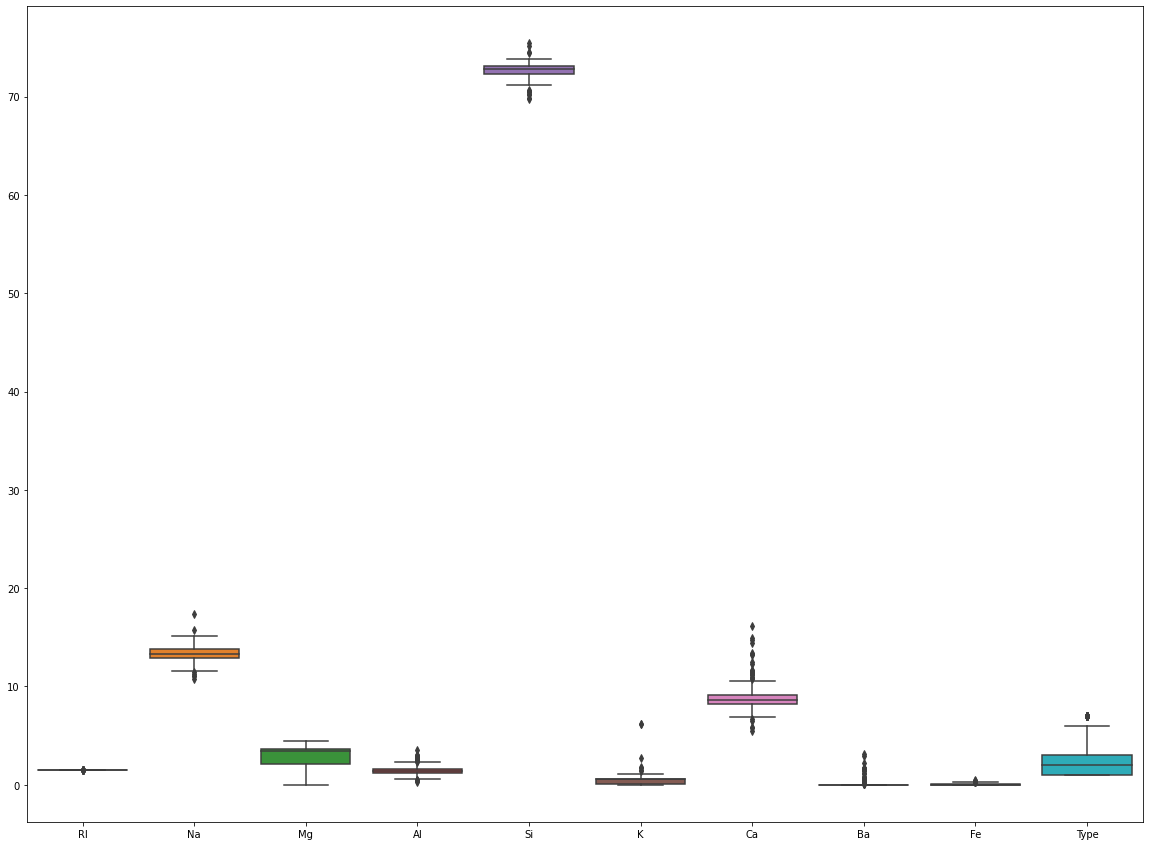

In [ ]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
sb.boxplot(data=df, ax=ax)
plt.show()

C:\Users\dell\AppData\Local\Temp/ipykernel_1728/2555487093.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


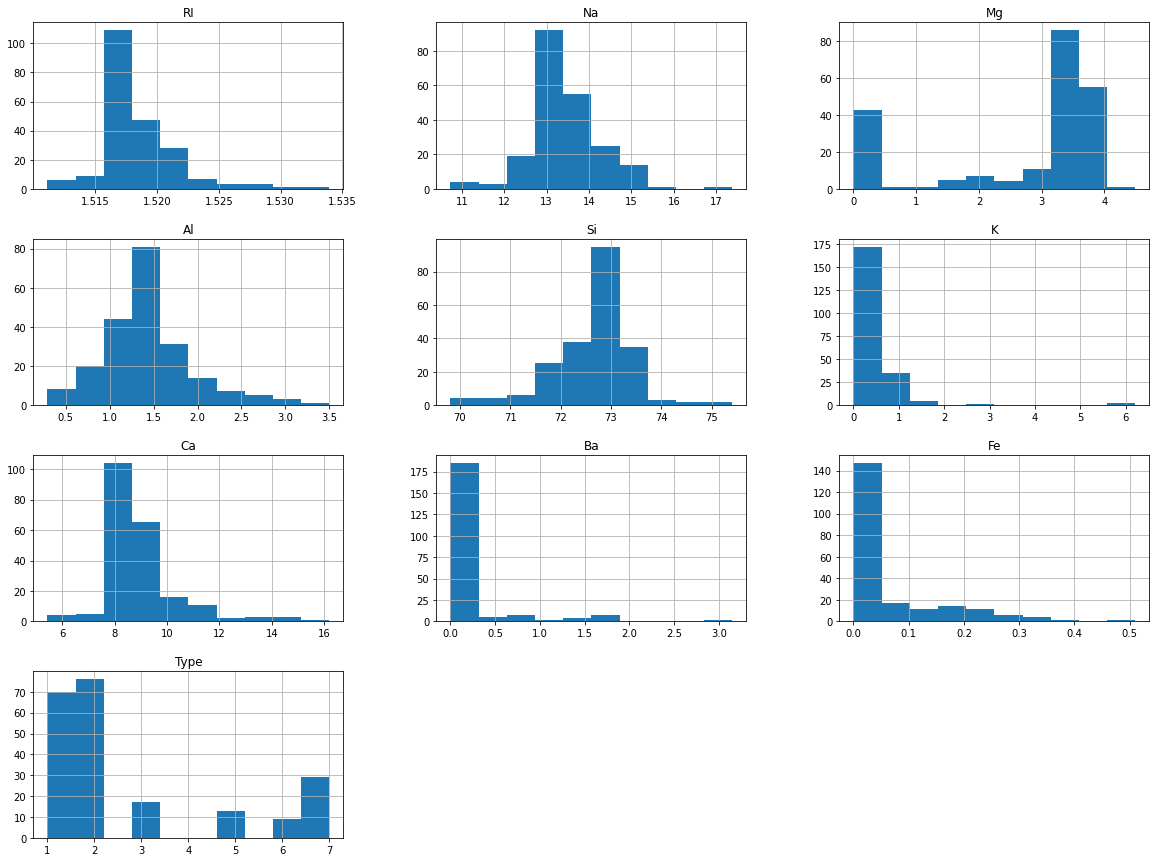

In [ ]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

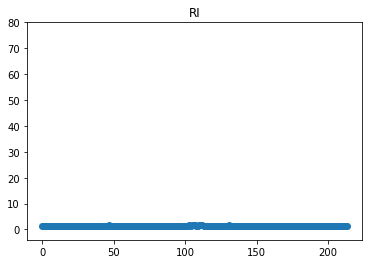

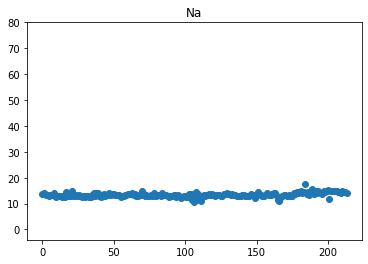

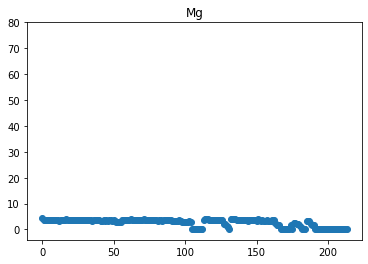

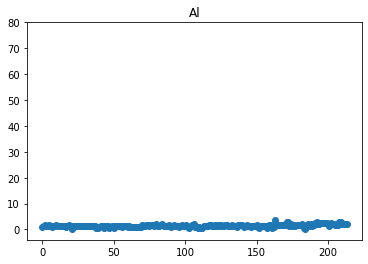

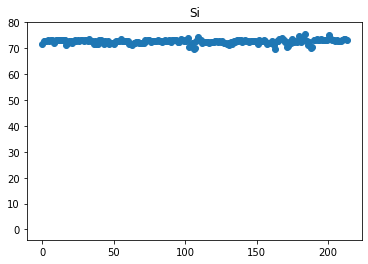

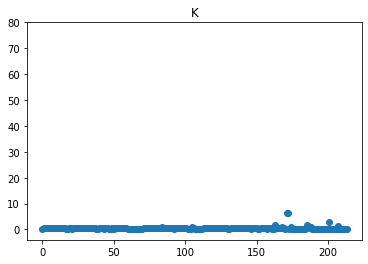

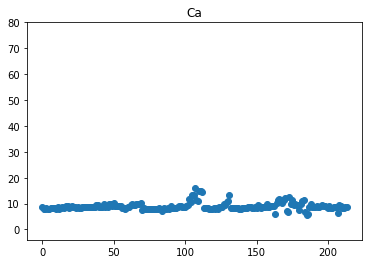

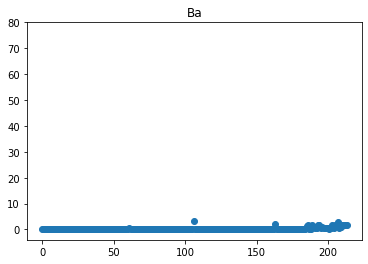

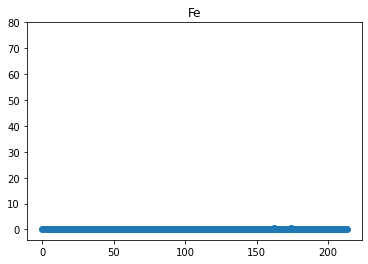

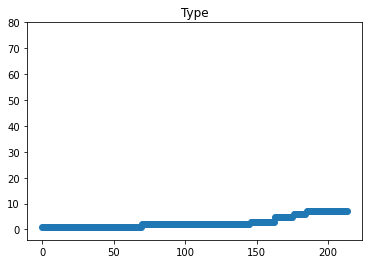

In [ ]:
for col in df.columns:
    plt.scatter(df.index, df[col])
    plt.ylim(-4, 80)
    plt.title(col)
    plt.savefig(f'{col}.jpeg')
    plt.show()

# for type column (class)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


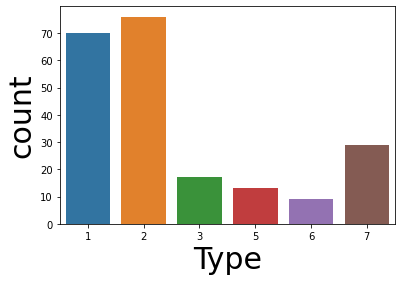

In [ ]:
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["axes.labelsize"] = 30
sb.countplot( df['Type']  , linewidth=5,  label='big')
plt.show()

# Pair plot

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

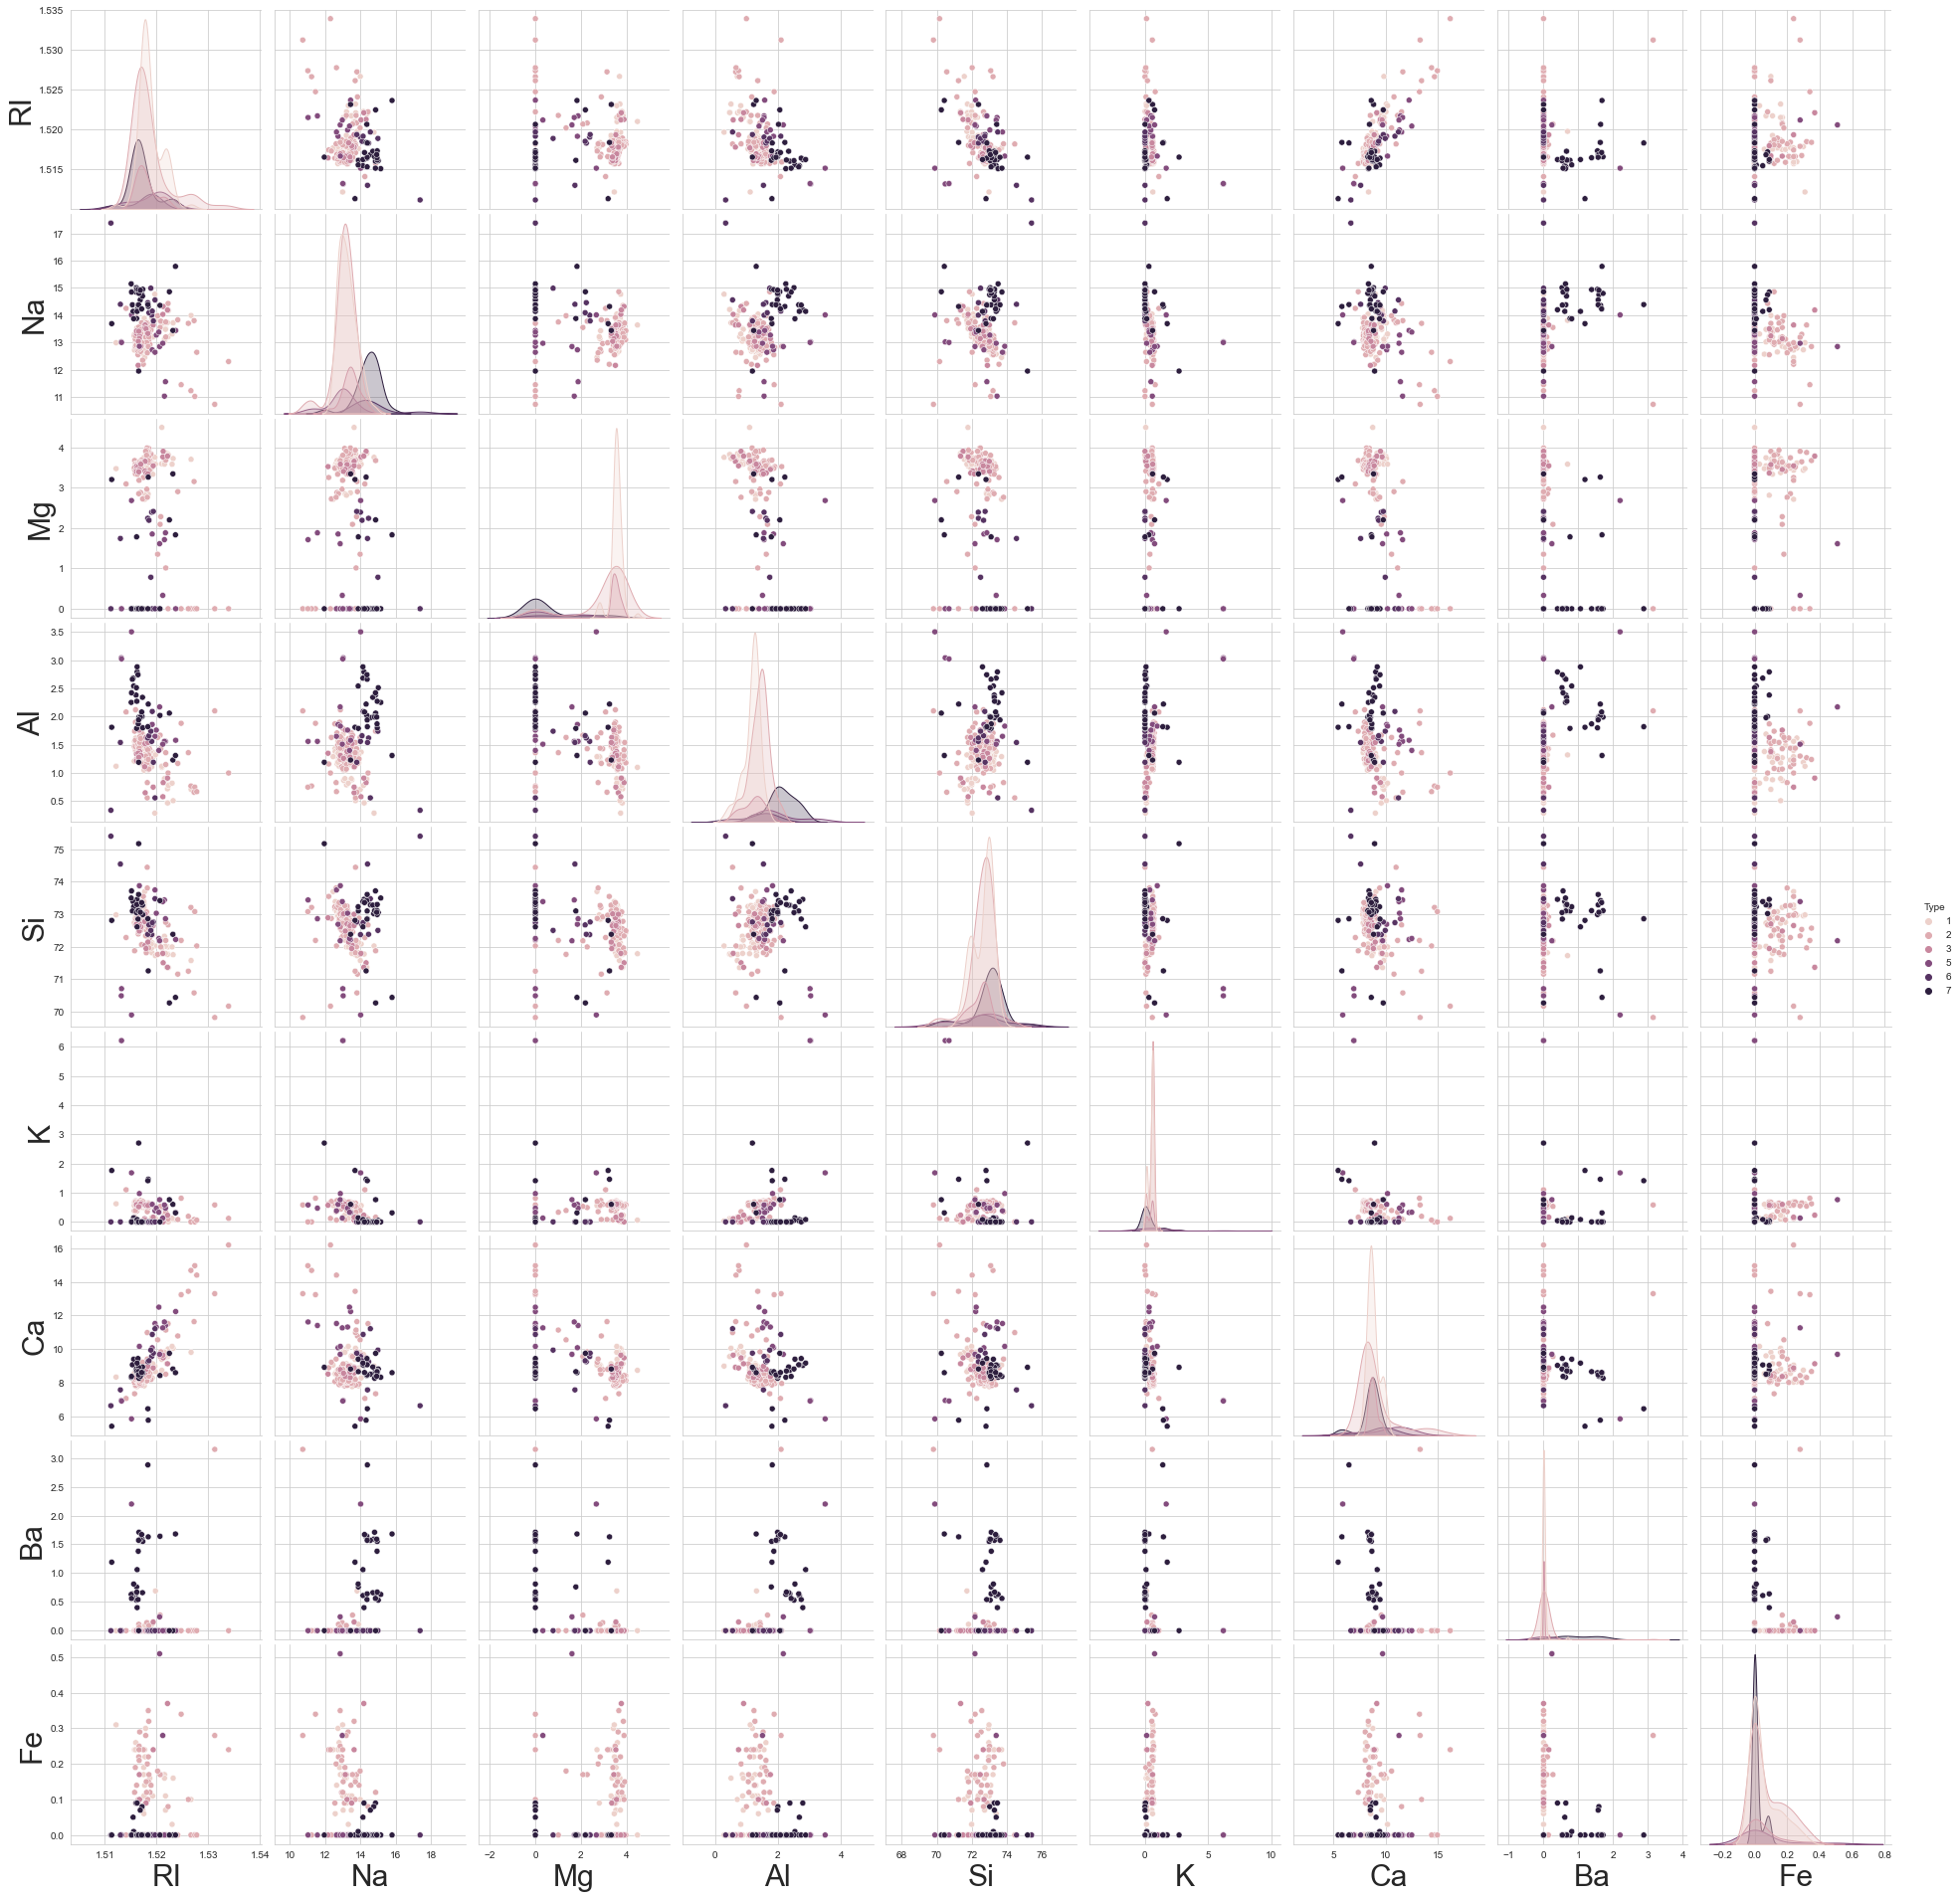

In [ ]:
plt.figure(figsize=(8,8))
sb.set_style("whitegrid")
sb.pairplot(data=df,hue='Type',size=3)
plt.savefig(f'{col}.jpeg')
plt.show()